# House Price Prediction using Multiple Linear Regression

<center><img src="https://raw.githubusercontent.com/Masterx-AI/Project_Housing_Price_Prediction_/main/hs.jpg" style="width: 700px;"/>

Description:

A simple yet challenging project, to predict the housing price based on certain factors like house area, bedrooms, furnished, nearness to mainroad, etc. The dataset is small yet, it's complexity arises due to the fact that it has strong multicollinearity. Can you overcome these obstacles & build a decent predictive model?

## Import libraries 🐍

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

## Step 1: Understand the Dataset

Load the dataset

In [2]:
df = pd.read_csv("house_prices.csv")

Show 10 random samples

In [3]:
# Random 10 samples of data
df.sample(10)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
414,3423000,4040,2,1,1,yes,no,no,no,no,0,no,unfurnished
60,7140000,6000,3,2,2,yes,yes,no,no,no,1,no,semi-furnished
151,5565000,4400,4,1,2,yes,no,no,no,yes,2,yes,semi-furnished
68,6860000,6000,3,1,1,yes,no,no,no,yes,1,no,furnished
146,5600000,10500,2,1,1,yes,no,no,no,no,1,no,semi-furnished
318,4060000,4340,3,1,1,yes,no,no,no,no,0,no,semi-furnished
497,2660000,3934,2,1,1,yes,no,no,no,no,0,no,unfurnished
166,5320000,7800,3,1,1,yes,no,yes,no,yes,2,yes,unfurnished
499,2660000,3630,3,3,2,no,yes,no,no,no,0,no,unfurnished
500,2660000,2800,3,1,1,yes,no,no,no,no,0,no,unfurnished


Display dataset information

In [4]:
# Data Information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


Show dataset dimensions

In [5]:
df.shape # data shape

(545, 13)

Show dataset statistical summary

In [6]:
df.describe() # data stats

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


Check for null values

In [7]:
df.isnull().sum() # null values check

price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64

Check for duplicate values

In [8]:
df.duplicated().sum() # duplicate values check

0

## Step 2: Visualize the Dataset

Check the relationship between area and price using a scatterplot

<Axes: xlabel='area', ylabel='price'>

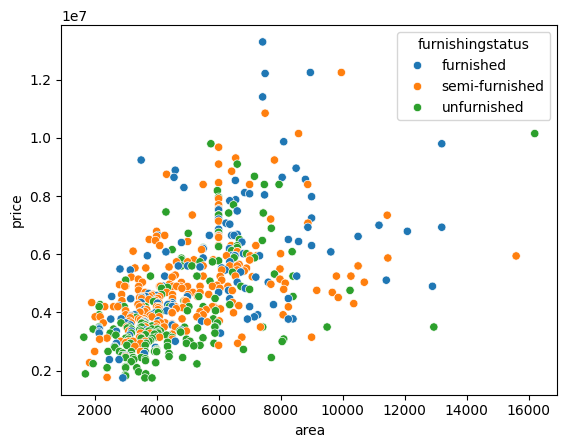

In [9]:
# Put your answer here
sns.scatterplot(y=df['price'],x=df['area'],hue=df['furnishingstatus'])

 Check the relationships between the independent and dependent variables using `.pairplot()`

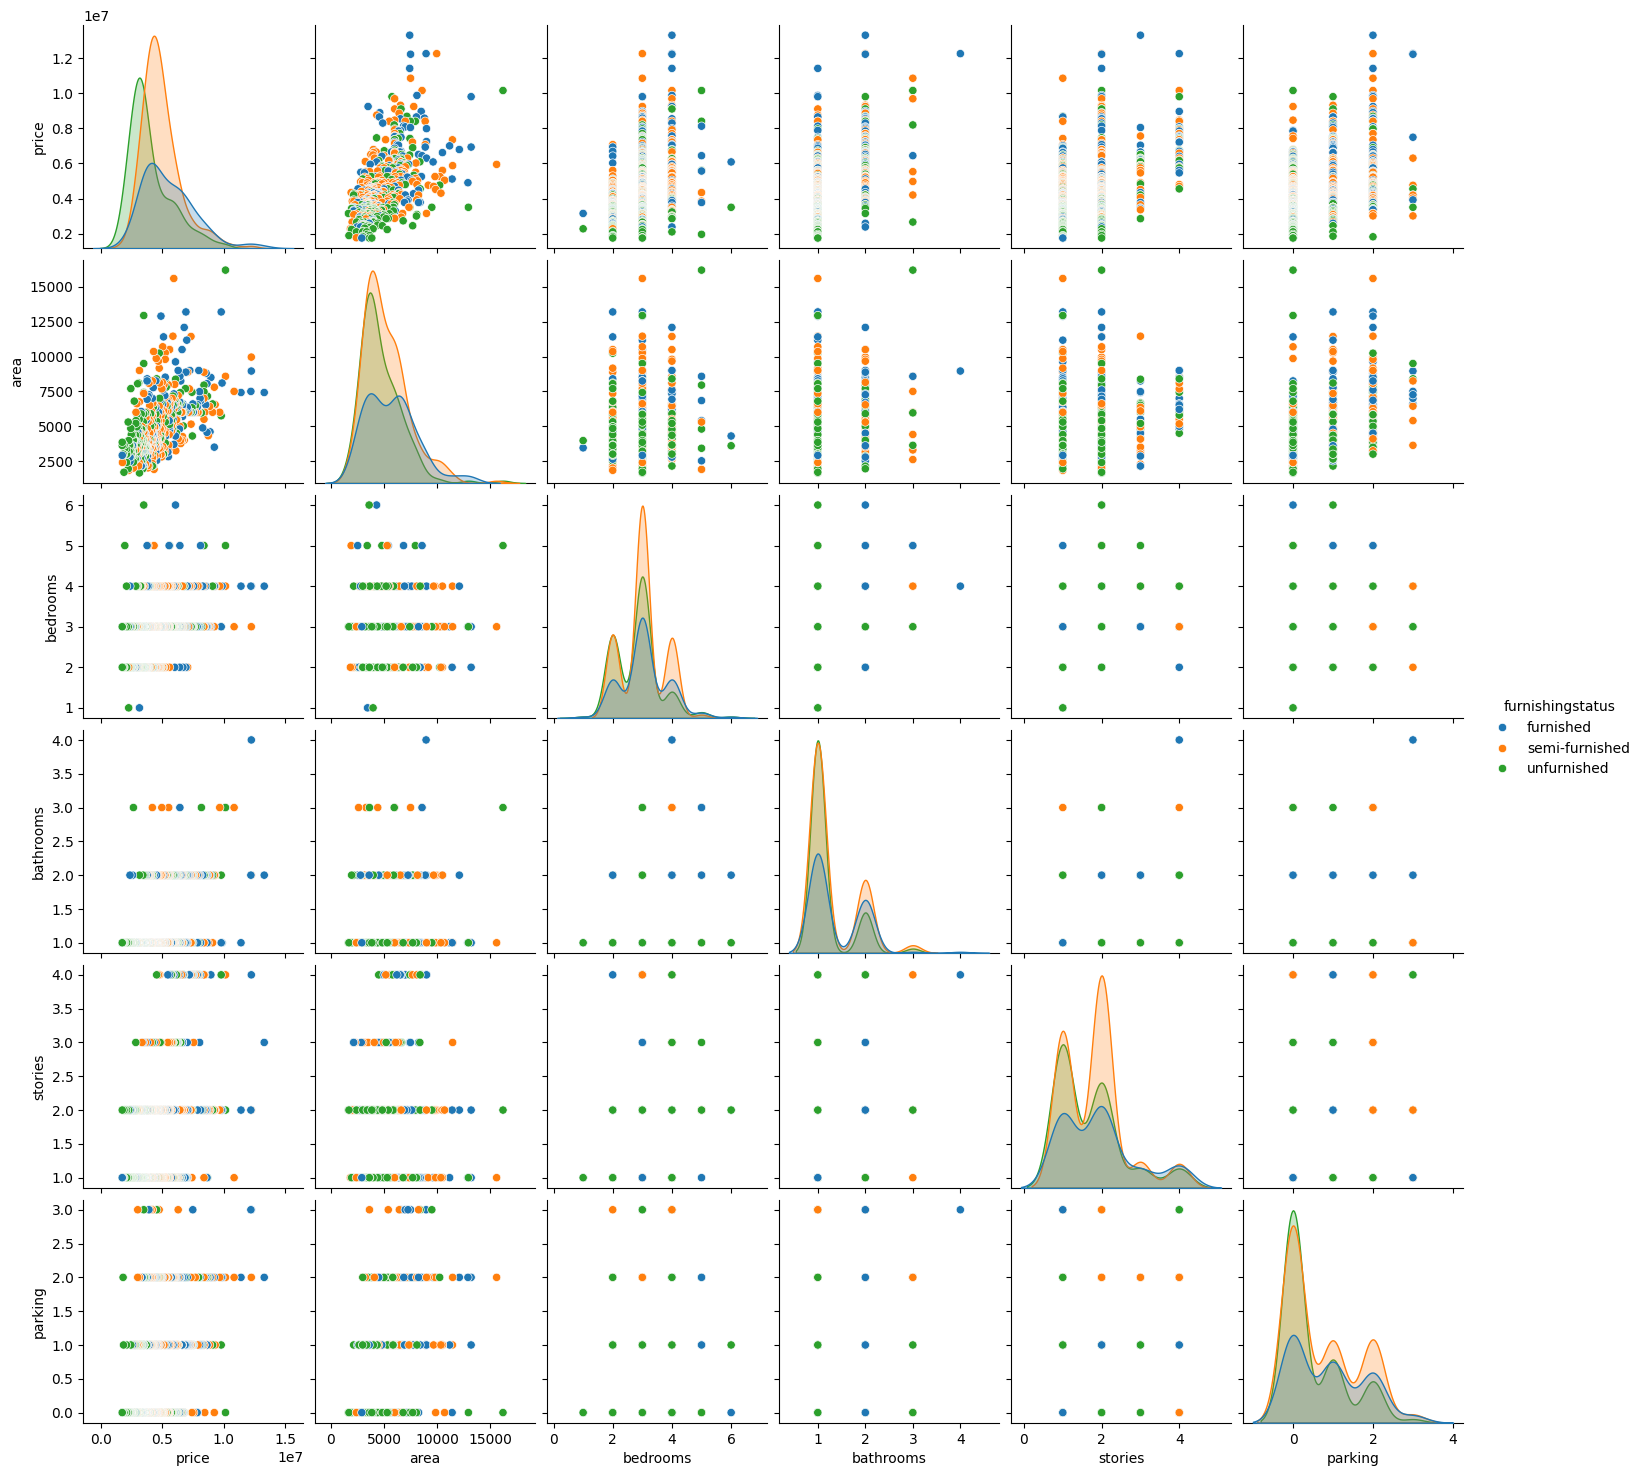

In [10]:
sns.pairplot(df,hue="furnishingstatus")

## Step 3: Perform necessary data pre-processing

Create a duplicate of the original dataset

In [11]:
# Put your answer here
data=df.copy()

Convert the categorical columns into numbers/dummy variables by using the `get_dummies()` method.

- furnishingstatus
- mainroad
- guestroom
- basement
- hotwaterheating
- airconditioning
- prefarea

In [13]:
status = pd.get_dummies(data[['furnishingstatus','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']])

In [14]:
status

,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad_no,mainroad_yes,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,True,False,False,False,True,True,False,True,False,True,False,False,True,False,True
1,True,False,False,False,True,True,False,True,False,True,False,False,True,True,False
2,False,True,False,False,True,True,False,False,True,True,False,True,False,False,True
3,True,False,False,False,True,True,False,False,True,True,False,False,True,False,True
4,True,False,False,False,True,False,True,False,True,True,False,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,False,False,True,False,True,True,False,False,True,True,False,True,False,True,False
541,False,True,False,True,False,True,False,True,False,True,False,True,False,True,False
542,False,False,True,False,True,True,False,True,False,True,False,True,False,True,False
543,True,False,False,True,False,True,False,True,False,True,False,True,False,True,False


Concatenate the converted columns to the dataframe copy using `.concat()`

In [15]:
data = pd.concat([data, status], axis = 1)

In [16]:
data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,...,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,13300000,7420,4,2,3,yes,no,no,no,yes,...,True,False,True,False,True,False,False,True,False,True
1,12250000,8960,4,4,4,yes,no,no,no,yes,...,True,False,True,False,True,False,False,True,True,False
2,12250000,9960,3,2,2,yes,no,yes,no,no,...,True,False,False,True,True,False,True,False,False,True
3,12215000,7500,4,2,2,yes,no,yes,no,yes,...,True,False,False,True,True,False,False,True,False,True
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,...,False,True,False,True,True,False,False,True,True,False


Remove the categorical columns using `.drop()`.

- furnishingstatus
- mainroad
- guestroom
- basement
- hotwaterheating
- airconditioning
- prefarea

In [17]:
# Put your answer here
data.drop(['furnishingstatus','mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea'], axis = 1, inplace = True)

In [18]:
data.head()

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad_no,...,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
0,13300000,7420,4,2,3,2,True,False,False,False,...,True,False,True,False,True,False,False,True,False,True
1,12250000,8960,4,4,4,3,True,False,False,False,...,True,False,True,False,True,False,False,True,True,False
2,12250000,9960,3,2,2,2,False,True,False,False,...,True,False,False,True,True,False,True,False,False,True
3,12215000,7500,4,2,2,3,True,False,False,False,...,True,False,False,True,True,False,False,True,False,True
4,11410000,7420,4,1,2,2,True,False,False,False,...,False,True,False,True,True,False,False,True,True,False


## Step 4: Feature Selection

Check for multicollinearity between the features/independent variables using `.corr()`

In [19]:
# Put your answer here
correlation = data.corr()
correlation

,price,area,bedrooms,bathrooms,stories,parking,furnishingstatus_furnished,furnishingstatus_semi-furnished,furnishingstatus_unfurnished,mainroad_no,...,guestroom_no,guestroom_yes,basement_no,basement_yes,hotwaterheating_no,hotwaterheating_yes,airconditioning_no,airconditioning_yes,prefarea_no,prefarea_yes
price,1.000000,0.535997,0.366494,0.517545,0.420712,0.384394,0.229350,0.063656,-0.280587,-0.296898,...,-0.255517,0.255517,-0.187057,0.187057,-0.093073,0.093073,-0.452954,0.452954,-0.329777,0.329777
area,0.535997,1.000000,0.151858,0.193820,0.083996,0.352980,0.145772,0.006156,-0.142278,-0.288874,...,-0.140297,0.140297,-0.047417,0.047417,0.009229,-0.009229,-0.222393,0.222393,-0.234779,0.234779
bedrooms,0.366494,0.151858,1.000000,0.373930,0.408564,0.139270,0.079054,0.050040,-0.126252,0.012033,...,-0.080549,0.080549,-0.097312,0.097312,-0.046049,0.046049,-0.160603,0.160603,-0.079023,0.079023
bathrooms,0.517545,0.193820,0.373930,1.000000,0.326165,0.177496,0.108139,0.029834,-0.132107,-0.042398,...,-0.126469,0.126469,-0.102106,0.102106,-0.067159,0.067159,-0.186915,0.186915,-0.063472,0.063472
stories,0.420712,0.083996,0.408564,0.326165,1.000000,0.045547,0.093176,-0.003648,-0.082972,-0.121706,...,-0.043538,0.043538,0.172394,-0.172394,-0.018847,0.018847,-0.293602,0.293602,-0.044425,0.044425
parking,0.384394,0.352980,0.139270,0.177496,0.045547,1.000000,0.131234,0.041327,-0.165705,-0.204433,...,-0.037466,0.037466,-0.051497,0.051497,-0.067864,0.067864,-0.159173,0.159173,-0.091627,0.091627
furnishingstatus_furnished,0.229350,0.145772,0.079054,0.108139,0.093176,0.131234,1.000000,-0.496748,-0.409462,-0.129971,...,-0.099721,0.099721,-0.069852,0.069852,0.008472,-0.008472,-0.160994,0.160994,-0.100249,0.100249
furnishingstatus_semi-furnished,0.063656,0.006156,0.050040,0.029834,-0.003648,0.041327,-0.496748,1.000000,-0.588405,-0.011450,...,-0.005821,0.005821,-0.050284,0.050284,-0.063819,0.063819,0.053179,-0.053179,0.011535,-0.011535
furnishingstatus_unfurnished,-0.280587,-0.142278,-0.126252,-0.132107,-0.082972,-0.165705,-0.409462,-0.588405,1.000000,0.133123,...,0.099023,-0.099023,0.117935,-0.117935,0.059194,-0.059194,0.094086,-0.094086,0.081271,-0.081271
mainroad_no,-0.296898,-0.288874,0.012033,-0.042398,-0.121706,-0.204433,-0.129971,-0.011450,0.133123,1.000000,...,0.092337,-0.092337,0.044002,-0.044002,-0.011781,0.011781,0.105423,-0.105423,0.199876,-0.199876


 Visualize the correlation by using a heatmap.

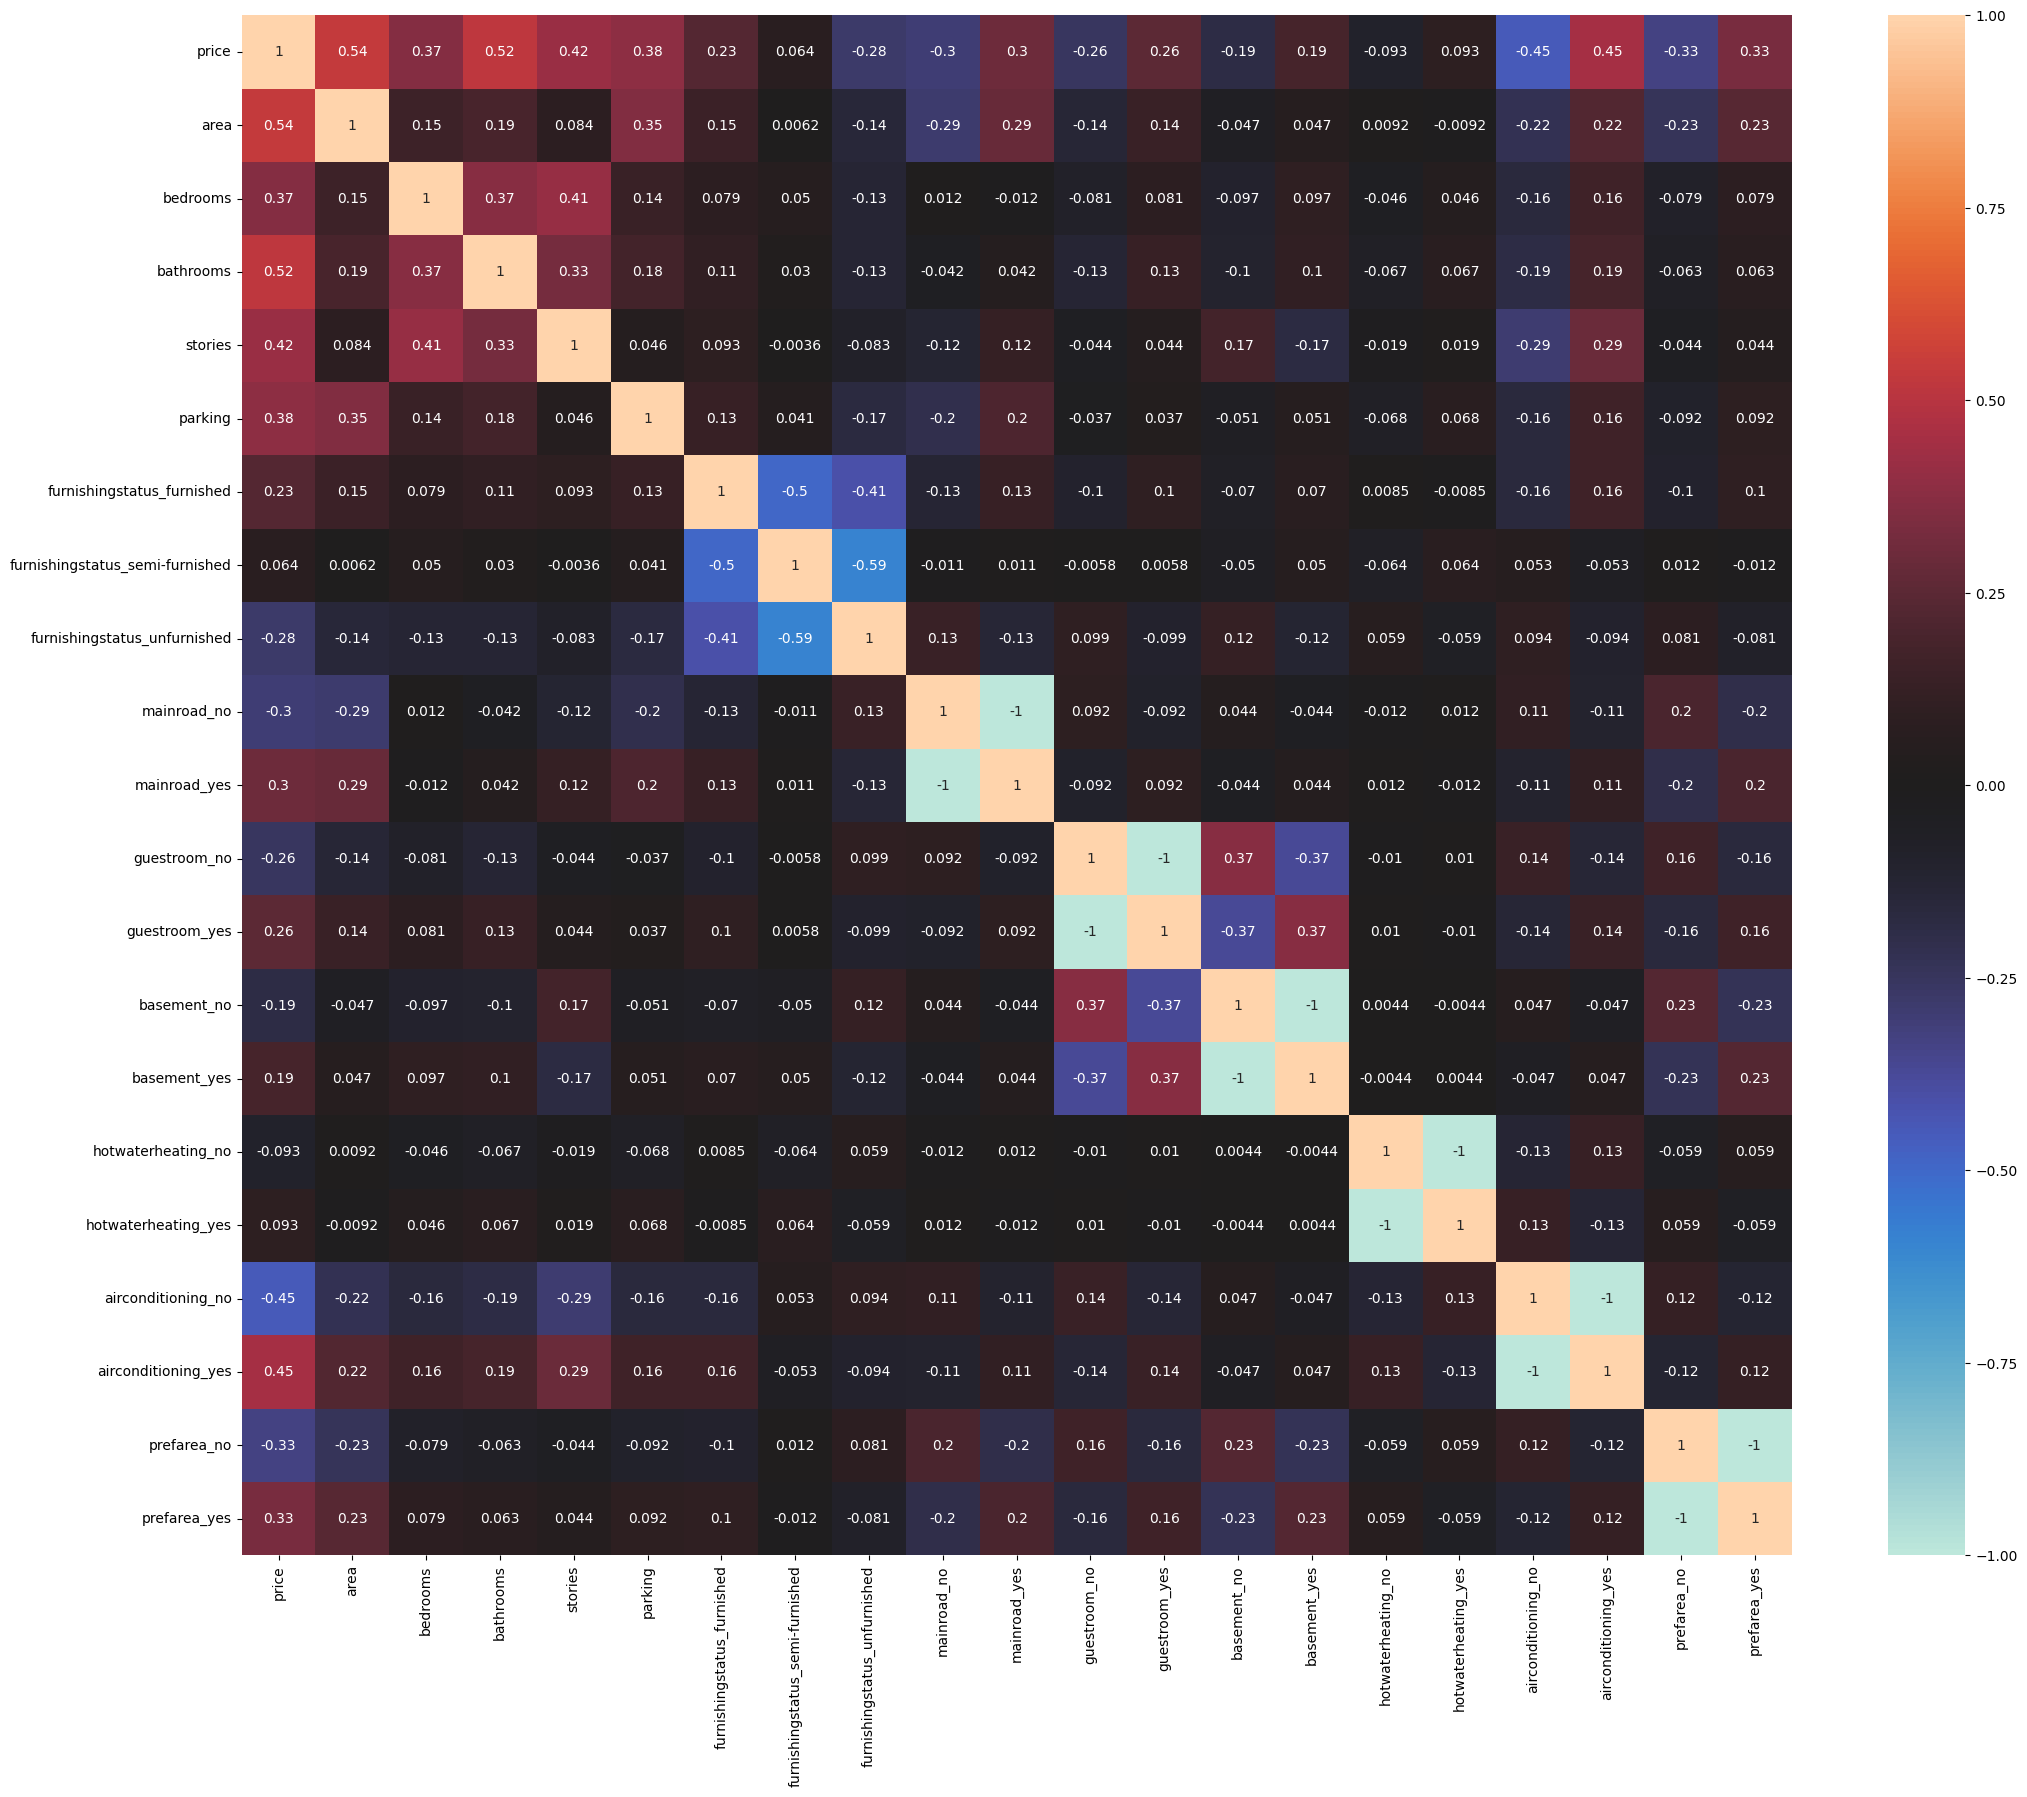

In [20]:
plt.figure(figsize=[25,20])
sns.heatmap(correlation, annot=True, vmin=-1, vmax=1, center=0)
plt.show()

By looking at the matrix, choose the independent variables that you would use in your model that would help in predicting the house price.

When choosing independent variables, we need to make sure that there are:
1. No redundant multicollinear variables.
2. All independent variables have a correlation with the dependent variable.



## Step 5: Building the Model

In [21]:
print(data.columns)

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'parking',
       'furnishingstatus_furnished', 'furnishingstatus_semi-furnished',
       'furnishingstatus_unfurnished', 'mainroad_no', 'mainroad_yes',
       'guestroom_no', 'guestroom_yes', 'basement_no', 'basement_yes',
       'hotwaterheating_no', 'hotwaterheating_yes', 'airconditioning_no',
       'airconditioning_yes', 'prefarea_no', 'prefarea_yes'],
      dtype='object')


Split the data set into a training and test set

In [112]:
# Put your answer here
X = data[['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'furnishingstatus_semi-furnished', 'mainroad_yes', 'basement_no', 'hotwaterheating_no', 'airconditioning_yes', 'prefarea_yes']]
y = data['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=12353)

Apply scaling on the independent variables in the training and test set using the `MinMaxScaler()` method.

In [113]:
# Put your answer here
scaler = MinMaxScaler(feature_range=(0,1))
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

Create a new dataframe containing the unscaled features

In [114]:
unscaled_df = pd.DataFrame(X_train, columns=X.columns)
unscaled_df.head()

,area,bedrooms,bathrooms,stories,parking,furnishingstatus_semi-furnished,mainroad_yes,basement_no,hotwaterheating_no,airconditioning_yes,prefarea_yes
77,6500,3,2,3,0,False,True,True,True,True,True
56,11440,4,1,2,1,True,True,False,True,False,True
66,13200,2,1,1,1,False,True,False,False,False,False
230,5400,2,1,2,0,True,True,True,True,False,True
169,6540,4,2,2,0,True,False,True,True,True,False


Create a new dataframe containing the scaled features

In [115]:
scaled_df = pd.DataFrame(X_train_scaled, columns=X.columns)
scaled_df.head()

,area,bedrooms,bathrooms,stories,parking,furnishingstatus_semi-furnished,mainroad_yes,basement_no,hotwaterheating_no,airconditioning_yes,prefarea_yes
0,0.419913,0.4,0.5,0.666667,0.000000,0.0,1.0,1.0,1.0,1.0,1.0
1,0.847619,0.6,0.0,0.333333,0.333333,1.0,1.0,0.0,1.0,0.0,1.0
2,1.000000,0.2,0.0,0.000000,0.333333,0.0,1.0,0.0,0.0,0.0,0.0
3,0.324675,0.2,0.0,0.333333,0.000000,1.0,1.0,1.0,1.0,0.0,1.0
4,0.423377,0.6,0.5,0.333333,0.000000,1.0,0.0,1.0,1.0,1.0,0.0


Use `LinearRegression()` as our algorithm for our model

In [116]:
# Put your answer here
model = LinearRegression()

Train our model using the training set.

In [117]:
# Put your answer here
model.fit(X_train_scaled, y_train)

LinearRegression()

Test the performance of the model using the test set

In [118]:
# Put your answer here
y_pred = model.predict(X_test_scaled)

## Coefficient of Determination ($R^2$)

Coefficient of determination is the portion of the total variation in the dependent variable that is explained by variation in the independent variable.  $R^2$ scores are calculated as below:

$$ R^2 = \frac{\sum(\hat{Y_i}-\bar{Y})^2}{\sum(Y_i-\bar{Y})^2} $$ 

In statsmodel we can obtain the $R^2$ value of our model by accesing the `.rsquared` attribute of the our model.

In [119]:
# Put your answer here
olsmod = sm.OLS(y_test, X_test_scaled).fit()
olsmod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.970
Model:                            OLS   Adj. R-squared (uncentered):              0.968
Method:                 Least Squares   F-statistic:                              457.1
Date:                Fri, 13 Sep 2024   Prob (F-statistic):                   5.57e-111
Time:                        22:05:55   Log-Likelihood:                         -2473.5
No. Observations:                 164   AIC:                                      4969.
Df Residuals:                     153   BIC:                                      5003.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1          2.014e+06   3.99e+05      5.042      0.000    1.22e+06     2.8e+06
x2          3.047e+06   5.41e+05      5.630      0.000    1.98e+06    4.12e+06
x3          2.582e+06   3.13e+05      8.245      0.000    1.96e+06     3.2e+06
x4          9.118e+05   3.15e+05      2.893      0.004    2.89e+05    1.53e+06
x5          7.512e+05   2.65e+05      2.832      0.005    2.27e+05    1.28e+06
x6          5.306e+05   1.41e+05      3.775      0.000    2.53e+05    8.08e+05
x7          6.667e+05   1.96e+05      3.402      0.001     2.8e+05    1.05e+06
x8          1.923e+05   1.58e+05      1.215      0.226    -1.2e+05    5.05e+05
x9          8.008e+05   2.18e+05      3.671      0.000     3.7e+05    1.23e+06
x10         9.192e+05   1.64e+05      5.620      0.000    5.96e+05    1.24e+06
x11         7.189e+05   1.85e+05      3.891      0.000    3.54e+05    1.08e+06
==============================================================================
Omnibus:                       11.224   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.004   Jarque-Bera (JB):               12.192
Skew:                           0.533   Prob(JB):                      0.00225
Kurtosis:                       3.805   Cond. No.                         14.5
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [120]:
olsmod.rsquared

0.9704683217030963

$R^2$ range between 0 and 1, 

where $R^2=0$ means there are no linear relationship between the variables 

and 

$R^2=1$ shows a perfect linear relationship. 

In our case, we got $R^2$ score about 0.9471 which means 94.71% of our dependent variable can be explained using our independent variables.